# Statistical Analysis of Mcdonalds Data

#### Aim of the study:
- To find out wheter:
    - Q1. As Serving Size increases do the calories in the food also increase?
    - Q2. Is the average Protein Content in 2 categories of food (Chicken/Fish and Beef/Pork) same or different?

### Lastly building a Linear Regression Model which predicts the Total Fat present in a food content based on it's Calories.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = r"D:\Data Science\Data Sets\Practise Data Sets\McD_Data.csv"
df = pd.read_csv(file_path)
df.head(10)

Category                                               Item  \
0  Breakfast                                       Egg McMuffin   
1  Breakfast                                  Egg White Delight   
2  Breakfast                                   Sausage McMuffin   
3  Breakfast                          Sausage McMuffin with Egg   
4  Breakfast                   Sausage McMuffin with Egg Whites   
5  Breakfast                               Steak & Egg McMuffin   
6  Breakfast      Bacon, Egg & Cheese Biscuit (Regular Biscuit)   
7  Breakfast        Bacon, Egg & Cheese Biscuit (Large Biscuit)   
8  Breakfast  Bacon, Egg & Cheese Biscuit with Egg Whites (R...   
9  Breakfast  Bacon, Egg & Cheese Biscuit with Egg Whites (L...   

     Serving Size  Calories  Calories from Fat  Total Fat  \
0  4.8 oz (136 g)       300                120       13.0   
1  4.8 oz (135 g)       250                 70        8.0   
2  3.9 oz (111 g)       370                200       23.0   
3  5.7 oz (161 g)       450                250       28.0   
4  5.7 oz (161 g)       400                210       23.0   
5  6.5 oz (185 g)       430                210       23.0   
6  5.3 oz (150 g)       460                230       26.0   
7  5.8 oz (164 g)       520                270       30.0   
8  5.4 oz (153 g)       410                180       20.0   
9  5.9 oz (167 g)       470                220       25.0   

   Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  \
0                         20            5.0                             25   
1                         12            3.0                             15   
2                         35            8.0                             42   
3                         43           10.0                             52   
4                         35            8.0                             42   
5                         36            9.0                             46   
6                         40           13.0                             65   
7                         47           14.0                             68   
8                         32           11.0                             56   
9                         38           12.0                             59   

   Trans Fat  ...  Carbohydrates  Carbohydrates (% Daily Value)  \
0        0.0  ...             31                             10   
1        0.0  ...             30                             10   
2        0.0  ...             29                             10   
3        0.0  ...             30                             10   
4        0.0  ...             30                             10   
5        1.0  ...             31                             10   
6        0.0  ...             38                             13   
7        0.0  ...             43                             14   
8        0.0  ...             36                             12   
9        0.0  ...             42                             14   

   Dietary Fiber  Dietary Fiber (% Daily Value)  Sugars  Protein  \
0              4                             17       3       17   
1              4                             17       3       18   
2              4                             17       2       14   
3              4                             17       2       21   
4              4                             17       2       21   
5              4                             18       3       26   
6              2                              7       3       19   
7              3                             12       4       19   
8              2                              7       3       20   
9              3                             12       4       20   

   Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
0                         10                          0   
1                          6                          0   
2                          8                          0   
3           

In [3]:
df.describe()

Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                      26.639209    0.429133    87.269257   
min         0.000000                       0.000000    0.000000     0.000000   
25%         1.000000                       4.750000    0.000000     5.000000   
50%         5.000000                      24.000000    0.000000    35.000000   
75%        10.000000                      48.000000    0.000000    65.000000   
max        20.000000                     102.000000    2.500000   575.000000   

       Cholesterol (% Daily Value)       Sodium  ...  Carbohydrates  \
count                   260.000000   260.000000  ...     260.000000   
mean                     18.392308   495.750000  ...      47.346154   
std                      29.091653   577.026323  ...      28.252232   
min                       0.000000     0.000000  ...       0.000000   
25%                       2.000000   107.500000  ...      30.000000   
50%                      11.000000   190.000000  ...      44.000000   
75%                      21.250000   865.000000  ...      60.000000   
max                     192.000000  3600.000000  ...     141.000000   

       Carbohydrates (% Daily Value)  Dietary Fiber  \
count                     260.000000     260.000000   
mean                       15.780769       1.630769   
std                         9.419544       1.567717   
min                         0.000000       0.000000   
25%                        10.000000       0.000000   
50%                        15.000000       1.000000   
75%                        20.000000       3.000000   
max                        47.000000       7.000000   

       Dietary Fiber (% Daily Value)      Sugars     Protein  \
count                     260.000000  260.000000  260.000000   
mean                        6.530769   29.423077   13.338462   
std                         6.307057   28.679797   11.426146   
min                         0.000000    0.000000    0.000000   
25%                         0.000000    5.750000    4.000000   
50%                         5.000000   17.500000   12.000000   
75%                        10.000000   48.000000   19.000000   
max                        28.000000  128.000000   87.000000   

       Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
count                 260.000000                 260.000000   
mean                   13.426923                   8.534615   
std                    24.366381                  26.345542   
min                     0.000000                   0.000000   
25%                     2.000000                   0.000000   
50%                     8.000000                   0.000000   
75%                    15.000000                   4.000000   
max                   170.000000                 240.000000   

       Calcium (% Daily Value)  Iron (% Daily Value)  
count               260.000000            260.000000  
mean                 20.973077              7.734615  
std                  17.019953              8.723263  
min                   0.000000              0.000000  
25%         

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
df.shape

(260, 24)

#### Checking For Null and Duplicated Values

In [6]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [Category, Item, Serving Size, Calories, Calories from Fat, Total Fat, Total Fat (% Daily Value), Saturated Fat, Saturated Fat (% Daily Value), Trans Fat, Cholesterol, Cholesterol (% Daily Value), Sodium, Sodium (% Daily Value), Carbohydrates, Carbohydrates (% Daily Value), Dietary Fiber, Dietary Fiber (% Daily Value), Sugars, Protein, Vitamin A (% Daily Value), Vitamin C (% Daily Value), Calcium (% Daily Value), Iron (% Daily Value)]
Index: []

[0 rows x 24 columns]

We can see there are no null and duplicated values

#### Filtering out Serving Size and Calories to see if they have a relationshiup

<Axes: >

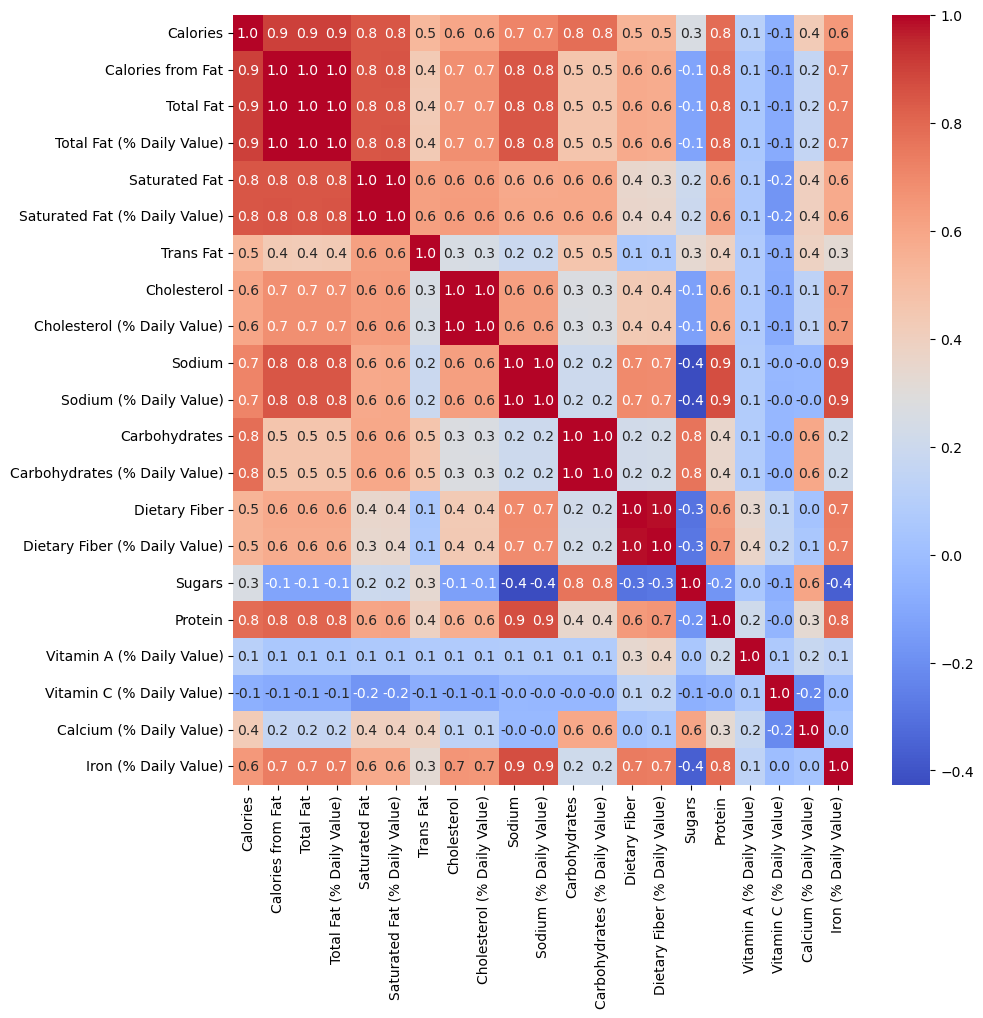

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, fmt=".1f", cmap='coolwarm')

#### From the above heatmap, there a a few variables that might have a potential relationship.

1. Calories and Protein (0.8)
2. Calories and Carbohydrates (0.8)
3. Calories and Total Fat (0.9)
4. Calories and Serving Size

#### Exploring the relationship between Serving Size and Calories

In [9]:
df['Serving Size'].unique()

array(['4.8 oz (136 g)', '4.8 oz (135 g)', '3.9 oz (111 g)',
       '5.7 oz (161 g)', '6.5 oz (185 g)', '5.3 oz (150 g)',
       '5.8 oz (164 g)', '5.4 oz (153 g)', '5.9 oz (167 g)',
       '4.1 oz (117 g)', '4.6 oz (131 g)', '5.7 oz (163 g)',
       '6.2 oz (177 g)', '6.4 oz (181 g)', '5 oz (143 g)',
       '5.5 oz (157 g)', '7.1 oz (201 g)', '6.1 oz (174 g)',
       '6.3 oz (178 g)', '5 oz (141 g)', '7.2 oz (205 g)',
       '6.9 oz (197 g)', '8.5 oz (241 g)', '9.5 oz (269 g)',
       '10 oz (283 g)', '9.6 oz (272 g)', '10.1 oz (286 g)',
       '14.8 oz (420 g)', '15.3 oz (434 g)', '14.9 oz (423 g)',
       '15.4 oz (437 g)', '5.3 oz (151 g)', '6.8 oz (192 g)',
       '2 oz (56 g)', '4 oz (114 g)', '9.6 oz (251 g)', '7.4 oz (211 g)',
       '7.1 oz (202 g)', '8 oz (227 g)', '8.3 oz (235 g)',
       '8.6 oz (244 g)', '3.5 oz (98 g)', '4 oz (113 g)',
       '9.5 oz (270 g)', '5.2 oz (147 g)', '6.7 oz (190 g)',
       '5.6 oz (159 g)', '7.3 oz (208 g)', '7.5 oz (213 g)',
       '7 oz (20

In [10]:
x_data = df['Serving Size'].str.extract(r'(\d+(?:\.\d+)?)').astype(float)[0]
y_data = df['Calories']

# naming the series
x_data = pd.Series(x_data, name='Serving Size')

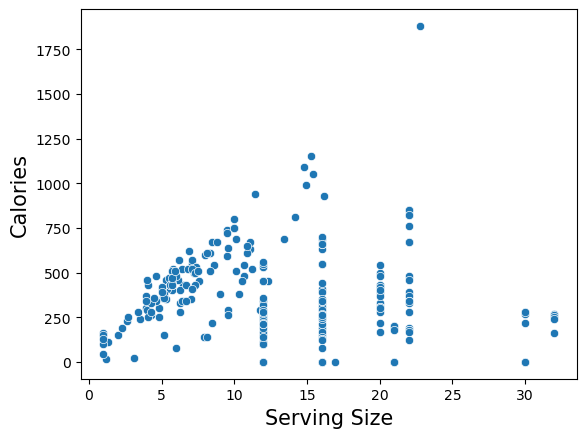

In [11]:
sns.scatterplot(x=x_data, y=y_data)

plt.xlabel('Serving Size', fontsize=15)
plt.ylabel('Calories', fontsize=15)
plt.show()

In [12]:
df1 = pd.DataFrame(data={'Serving Size': x_data, 'Calories': y_data})

In [13]:
df1

Serving Size  Calories
0             4.8       300
1             4.8       250
2             3.9       370
3             5.7       450
4             5.7       400
..            ...       ...
255          10.1       510
256          13.4       690
257           6.7       340
258          14.2       810
259           7.1       410

[260 rows x 2 columns]

In [14]:
df1.corr()

Serving Size  Calories
Serving Size       1.00000  -0.04879
Calories          -0.04879   1.00000

### From the above visualization and correlation analysis
- We can interpret there isn't a strong relationship between Serving Size and Calories, let's try some different columns.

## Hypothesis Testing

- Checking whether the average protein content is the same in Chicken & Fish and Beef & Pork

#### Two tailed independent t-test

In [15]:
# Hypothesis Formulation

Ho = 'The average protein in Chicken_Fish and Beef_Pork are the same'
Ha = 'The average protein in Chicken_Fish and Beef_Pork are different'

# Extracting the relevant data
chick_fsh = df[df['Category']=='Chicken & Fish']['Protein']
beef_prk = df[df['Category']=='Beef & Pork']['Protein']

# Checking to see if both categories have the same amount of datapoints
print(f"Data points in chicken and fish: {len(chick_fsh)}")
print(f"Data points in beef and pork: {len(beef_prk)}")

Data points in chicken and fish: 27
Data points in beef and pork: 15


In [16]:
# Taking the first 15 datapoints from chicken and fish to level the datapoints.
chick_fsh = chick_fsh[:15]

# Stating the alpha
alpha=0.05

tcal, pval = stats.ttest_ind(a=chick_fsh, b=beef_prk, equal_var=False)
# pval calculated is for both sides
# tcal calculated is for one side, the sign defines which side

if pval<alpha:
    print('''There is sufficient statistical evidence to reject the Ho.
This means, Chicken/Fish and Beef/Pork have different protein content on average.\n''')
else:
    print('''There is sufficient statistical evidence to fail to reject the Ho.
This means, Chicken/Fish and Beef/Pork have same protein content on average.\n''')
    
print(f"P value: {pval}")
print(f"T calculated: {tcal}")

There is sufficient statistical evidence to fail to reject the Ho.
This means, Chicken/Fish and Beef/Pork have same protein content on average.

P value: 0.6824659583937611
T calculated: 0.41341420573471716


In [17]:
# Calculating t-critical and concluding the result

# tcri corresponds to the quantile that's mentioned
lower_tcri = stats.t.ppf(q=0.025, df=28)

if tcal<lower_tcri:
    print('''There is sufficient statistical evidence to reject the Ho.
This means, Chicken/Fish and Beef/Pork have different protein content on average.\n''')
else:
    print('''There is sufficient statistical evidence to fail to reject the Ho.
This means, Chicken/Fish and Beef/Pork have same protein content on average.\n''')

There is sufficient statistical evidence to fail to reject the Ho.
This means, Chicken/Fish and Beef/Pork have same protein content on average.



In [18]:
# Calculating the standard error for the 2 categories
se_chck = chick_fsh.std()/math.sqrt(len(chick_fsh))
se_beef = beef_prk.std()/math.sqrt(len(beef_prk))

# Calculating the confidence interval for the 2 categories
lower_chck, upper_chck = stats.t.interval(alpha=0.95, loc=chick_fsh.mean(), scale=se_chck, df=14)
lower_beef, upper_beef = stats.t.interval(alpha=0.95, loc=beef_prk.mean(), scale=se_beef, df=14)

print("We can say we 95% confidence that: ")
print('-------------------------------------')
print(f'The mean protein of Chicken/Fish lies between: {round(lower_chck,2)}g and {round(upper_chck,2)}g\n'
      '-------------------------------------\n'
      f'The mean protein of Beef/Pork lies between: {round(lower_beef,2)}g and {round(upper_beef,2)}g')

We can say we 95% confidence that: 
-------------------------------------
The mean protein of Chicken/Fish lies between: 23.77g and 33.7g
-------------------------------------
The mean protein of Beef/Pork lies between: 22.03g and 32.64g


### Building a Linear Regression model off of `Calories` and `Total Fat`

- Since there is a strong correlation between them - 0.904

In [19]:
calories = df['Calories']
total_fat = df['Total Fat']

### Visualizing the relationship between Calories and Total Fat

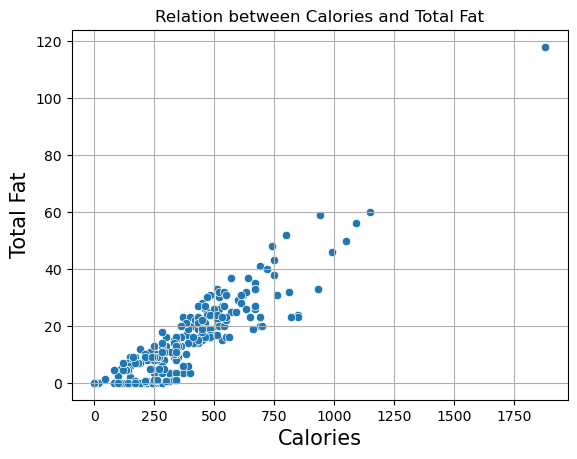

In [20]:
sns.scatterplot(x=calories, y=total_fat)

plt.title("Relation between Calories and Total Fat")
plt.xlabel('Calories', fontsize=15)
plt.ylabel('Total Fat', fontsize=15)
plt.grid(True)
plt.show()

In [21]:
# Importing necessary libraries

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Reshaping my dataset
x_train = np.array(calories).reshape(-1,1)
y_train = total_fat

# Fitting the model
model = lr.fit(x_train,y_train)

weight = model.coef_
bias = model.intercept_

print(f"Weight is: {weight[0]}")
print(f"Bias is: {bias}")

Weight is: 0.05347334574486899
Bias is: -5.527203288735409


#### Predicting the Model

In [22]:
y_pred = lr.predict(x_train)
y_pred

array([10.51480043,  7.84113315, 14.25793464, 18.5358023 , 15.86213501,
       17.46633538, 19.07053575, 22.2789365 , 16.39686847, 19.60526921,
       17.46633538, 20.14000267, 21.74420304, 24.95260379, 19.07053575,
       22.2789365 , 16.39686847, 19.60526921, 23.34840341, 19.07053575,
       15.86213501, 16.93160192, 23.88313687, 21.20946958, 27.62627107,
       24.95260379, 30.29993836, 34.04307256, 37.25147331, 28.69573799,
       31.36940528, 52.75874357, 55.96714432, 47.411409  , 50.61980974,
       13.18846772, 22.2789365 , 10.51480043,  2.49379857, 19.07053575,
        9.98006698,  8.3758666 , 22.81366996, 22.2789365 , 26.55680416,
       27.09153762, 23.34840341, 34.57780602,  7.30639969,  9.98006698,
       17.46633538, 32.97360565, 14.79266809, 18.00106884, 17.46633538,
       17.46633538, 21.20946958, 21.74420304, 13.18846772, 30.29993836,
       21.74420304, 27.09153762, 18.5358023 , 34.57780602, 26.0220707 ,
       17.46633538, 13.72320118, 20.14000267, 17.46633538, 13.72

### Plotting the Model

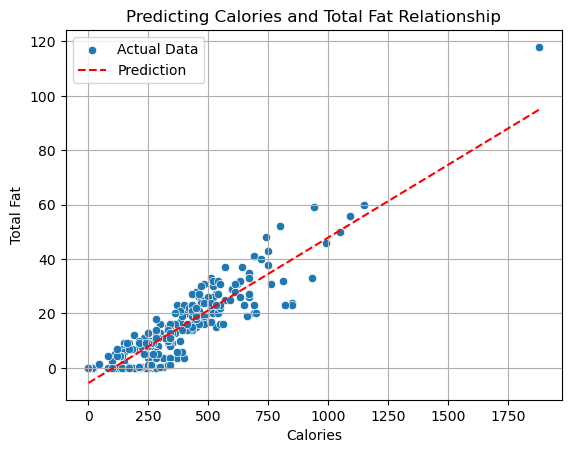

In [23]:
# Plotting the actual data
sns.scatterplot(x=calories, y=total_fat, label='Actual Data')

# Plotting the prediction
sns.lineplot(x=calories, y=y_pred, label='Prediction', c='r', linestyle='--')

plt.title("Predicting Calories and Total Fat Relationship")
plt.grid(True)
plt.show()

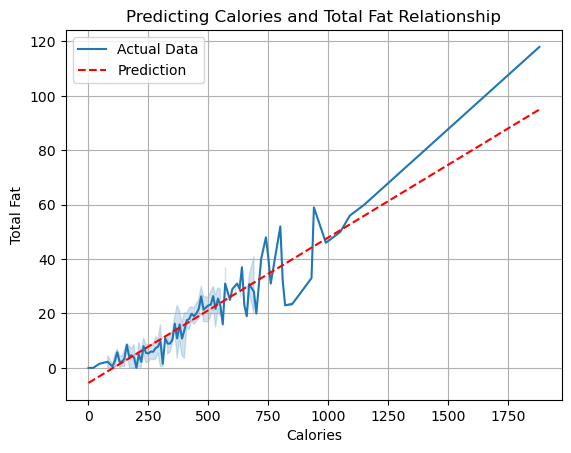

In [24]:
# Plotting the actual data
sns.lineplot(x=calories, y=total_fat, label='Actual Data')

# Plotting the prediction
sns.lineplot(x=calories, y=y_pred, label='Prediction', c='r', linestyle='--')

plt.title("Predicting Calories and Total Fat Relationship")
plt.grid(True)
plt.show()